# 베스트 모델

![property](https://cl.ly/bc9caf77154e/1.jpg)

To Learn
* validation_split
* val_loss & accuracy plot
* callback

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import os

In [5]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
df_pre = pd.read_csv("./dataset/wine.csv", header=None)

In [7]:
df = df_pre.sample(frac=1) #1 => 100%

In [8]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.40,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.40,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.70,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.60,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0
3521,7.0,0.12,0.19,4.90,0.055,27.0,127.0,0.99530,3.29,0.41,9.4,5,0
5211,6.8,0.16,0.18,1.80,0.046,31.0,114.0,0.99226,3.27,0.55,10.8,6,0
4936,6.9,0.38,0.29,13.65,0.048,52.0,189.0,0.99784,3.00,0.60,9.5,6,0
1161,8.8,0.45,0.43,1.40,0.076,12.0,21.0,0.99551,3.21,0.75,10.2,6,1
5993,6.3,0.20,0.26,12.70,0.046,60.0,143.0,0.99526,3.26,0.35,10.8,6,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5316 to 2732
Data columns (total 13 columns):
0     6497 non-null float64
1     6497 non-null float64
2     6497 non-null float64
3     6497 non-null float64
4     6497 non-null float64
5     6497 non-null float64
6     6497 non-null float64
7     6497 non-null float64
8     6497 non-null float64
9     6497 non-null float64
10    6497 non-null float64
11    6497 non-null int64
12    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [10]:
dataset = df.values
x = dataset[:,0:12]
y = dataset[:,12]

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, input_dim=12, activation='relu'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
# save_best_only = True => 이전 모델 보다 개선된 경우만 모델 저장
# verbose=1 => 진행사항 출력
# val_loss => 테스트셋 검증 오차
# loss => 학습셋 오차
# val_acc => 테스트셋 정확도
# acc => 학습셋 정확도
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, 
                                                  monitor='val_loss', 
                                                  verbose=1, 
                                                  save_best_only=True)

# 모델 실행 및 저장

In [14]:
# 모델을 저장하려면 callbacks를 추가

history = model.fit(x, y, validation_split=0.33, 
                    #verbose=0, callbacks=[checkpointer], 
                    epochs=3500, batch_size=500)

Train on 4352 samples, validate on 2145 samples
Epoch 1/3500
4352/4352 [==============================] - 1s 251us/sample - loss: 0.5551 - accuracy: 0.7574 - val_loss: 0.3778 - val_accuracy: 0.8252
Epoch 2/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.3629 - accuracy: 0.8688 - val_loss: 0.2949 - val_accuracy: 0.8946
Epoch 3/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.3199 - accuracy: 0.8824 - val_loss: 0.2781 - val_accuracy: 0.9007
Epoch 4/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.3014 - accuracy: 0.9005 - val_loss: 0.2625 - val_accuracy: 0.9240
Epoch 5/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.2849 - accuracy: 0.9125 - val_loss: 0.2528 - val_accuracy: 0.9301
Epoch 6/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.2739 - accuracy: 0.9120 - val_loss: 0.2401 - val_accuracy: 0.9273
Epoch 7/3500
4352/4352 [==============================] - 

4352/4352 [==============================] - 0s 10us/sample - loss: 0.1426 - accuracy: 0.9492 - val_loss: 0.1398 - val_accuracy: 0.9501
Epoch 56/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.1459 - accuracy: 0.9478 - val_loss: 0.1345 - val_accuracy: 0.9515
Epoch 57/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.1451 - accuracy: 0.9469 - val_loss: 0.1379 - val_accuracy: 0.9497
Epoch 58/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.1397 - accuracy: 0.9476 - val_loss: 0.1346 - val_accuracy: 0.9524
Epoch 59/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.1385 - accuracy: 0.9485 - val_loss: 0.1426 - val_accuracy: 0.9543
Epoch 60/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.1365 - accuracy: 0.9492 - val_loss: 0.1367 - val_accuracy: 0.9510
Epoch 61/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.1344 - accuracy: 0.9501 - val_los

Epoch 110/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0945 - accuracy: 0.9713 - val_loss: 0.0975 - val_accuracy: 0.9716
Epoch 111/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0947 - accuracy: 0.9710 - val_loss: 0.0967 - val_accuracy: 0.9716
Epoch 112/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0953 - accuracy: 0.9706 - val_loss: 0.0938 - val_accuracy: 0.9697
Epoch 113/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0968 - accuracy: 0.9683 - val_loss: 0.0937 - val_accuracy: 0.9692
Epoch 114/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0948 - accuracy: 0.9683 - val_loss: 0.0949 - val_accuracy: 0.9720
Epoch 115/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0916 - accuracy: 0.9727 - val_loss: 0.0928 - val_accuracy: 0.9706
Epoch 116/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0920 - accura

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0846 - accuracy: 0.9736 - val_loss: 0.0793 - val_accuracy: 0.9781
Epoch 165/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0752 - accuracy: 0.9786 - val_loss: 0.0756 - val_accuracy: 0.9790
Epoch 166/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0727 - accuracy: 0.9809 - val_loss: 0.0740 - val_accuracy: 0.9790
Epoch 167/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0729 - accuracy: 0.9805 - val_loss: 0.0739 - val_accuracy: 0.9781
Epoch 168/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0723 - accuracy: 0.9807 - val_loss: 0.0729 - val_accuracy: 0.9795
Epoch 169/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0726 - accuracy: 0.9789 - val_loss: 0.0743 - val_accuracy: 0.9790
Epoch 170/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0709 - accuracy: 0.9800 - v

4352/4352 [==============================] - 0s 9us/sample - loss: 0.0610 - accuracy: 0.9839 - val_loss: 0.0623 - val_accuracy: 0.9804
Epoch 219/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0658 - accuracy: 0.9818 - val_loss: 0.0659 - val_accuracy: 0.9795
Epoch 220/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0669 - accuracy: 0.9821 - val_loss: 0.0631 - val_accuracy: 0.9809
Epoch 221/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0644 - accuracy: 0.9809 - val_loss: 0.0616 - val_accuracy: 0.9814
Epoch 222/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0614 - accuracy: 0.9825 - val_loss: 0.0619 - val_accuracy: 0.9828
Epoch 223/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0592 - accuracy: 0.9841 - val_loss: 0.0625 - val_accuracy: 0.9814
Epoch 224/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0591 - accuracy: 0.9839 - val

4352/4352 [==============================] - 0s 9us/sample - loss: 0.0566 - accuracy: 0.9864 - val_loss: 0.0660 - val_accuracy: 0.9809
Epoch 273/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0591 - accuracy: 0.9816 - val_loss: 0.0662 - val_accuracy: 0.9800
Epoch 274/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0572 - accuracy: 0.9844 - val_loss: 0.0616 - val_accuracy: 0.9841
Epoch 275/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0548 - accuracy: 0.9839 - val_loss: 0.0602 - val_accuracy: 0.9841
Epoch 276/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0540 - accuracy: 0.9853 - val_loss: 0.0613 - val_accuracy: 0.9841
Epoch 277/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0535 - accuracy: 0.9848 - val_loss: 0.0598 - val_accuracy: 0.9846
Epoch 278/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0540 - accuracy: 0.9862 - 

4352/4352 [==============================] - 0s 9us/sample - loss: 0.0581 - accuracy: 0.9855 - val_loss: 0.0682 - val_accuracy: 0.9795
Epoch 327/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0567 - accuracy: 0.9848 - val_loss: 0.0600 - val_accuracy: 0.9841
Epoch 328/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0518 - accuracy: 0.9860 - val_loss: 0.0639 - val_accuracy: 0.9837
Epoch 329/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0529 - accuracy: 0.9853 - val_loss: 0.0660 - val_accuracy: 0.9814
Epoch 330/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0528 - accuracy: 0.9848 - val_loss: 0.0616 - val_accuracy: 0.9837
Epoch 331/3500
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0554 - val_accuracy: 0.9851
Epoch 332/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0510 - accuracy: 0.9869 - val

4352/4352 [==============================] - 0s 9us/sample - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0543 - val_accuracy: 0.9855
Epoch 381/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0475 - accuracy: 0.9874 - val_loss: 0.0579 - val_accuracy: 0.9851
Epoch 382/3500
4352/4352 [==============================] - 0s 14us/sample - loss: 0.0516 - accuracy: 0.9860 - val_loss: 0.0643 - val_accuracy: 0.9823
Epoch 383/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0502 - accuracy: 0.9867 - val_loss: 0.0566 - val_accuracy: 0.9855
Epoch 384/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0526 - accuracy: 0.9855 - val_loss: 0.0628 - val_accuracy: 0.9841
Epoch 385/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0540 - val_accuracy: 0.9865
Epoch 386/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0478 - accuracy: 0.9864 - v

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0469 - accuracy: 0.9867 - val_loss: 0.0533 - val_accuracy: 0.9865
Epoch 435/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0469 - accuracy: 0.9876 - val_loss: 0.0576 - val_accuracy: 0.9855
Epoch 436/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0473 - accuracy: 0.9874 - val_loss: 0.0535 - val_accuracy: 0.9855
Epoch 437/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.0527 - val_accuracy: 0.9855
Epoch 438/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0469 - accuracy: 0.9862 - val_loss: 0.0522 - val_accuracy: 0.9865
Epoch 439/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0459 - accuracy: 0.9869 - val_loss: 0.0538 - val_accuracy: 0.9860
Epoch 440/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0462 - accuracy: 0.9867 - 

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0449 - accuracy: 0.9885 - val_loss: 0.0544 - val_accuracy: 0.9855
Epoch 489/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0456 - accuracy: 0.9878 - val_loss: 0.0548 - val_accuracy: 0.9860
Epoch 490/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0443 - accuracy: 0.9881 - val_loss: 0.0545 - val_accuracy: 0.9869
Epoch 491/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0440 - accuracy: 0.9871 - val_loss: 0.0542 - val_accuracy: 0.9855
Epoch 492/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0530 - val_accuracy: 0.9869
Epoch 493/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0466 - accuracy: 0.9881 - val_loss: 0.0546 - val_accuracy: 0.9860
Epoch 494/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0461 - accuracy: 0.9874 - 

Epoch 542/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0427 - accuracy: 0.9890 - val_loss: 0.0527 - val_accuracy: 0.9869
Epoch 543/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0462 - accuracy: 0.9874 - val_loss: 0.0534 - val_accuracy: 0.9869
Epoch 544/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0446 - accuracy: 0.9876 - val_loss: 0.0531 - val_accuracy: 0.9869
Epoch 545/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0471 - accuracy: 0.9874 - val_loss: 0.0525 - val_accuracy: 0.9874
Epoch 546/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0472 - accuracy: 0.9860 - val_loss: 0.0533 - val_accuracy: 0.9865
Epoch 547/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0436 - accuracy: 0.9878 - val_loss: 0.0530 - val_accuracy: 0.9860
Epoch 548/3500
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0436 - accur

4352/4352 [==============================] - 0s 9us/sample - loss: 0.0426 - accuracy: 0.9883 - val_loss: 0.0538 - val_accuracy: 0.9869
Epoch 597/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0420 - accuracy: 0.9890 - val_loss: 0.0561 - val_accuracy: 0.9874
Epoch 598/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0433 - accuracy: 0.9878 - val_loss: 0.0521 - val_accuracy: 0.9865
Epoch 599/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0437 - accuracy: 0.9887 - val_loss: 0.0526 - val_accuracy: 0.9860
Epoch 600/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0452 - accuracy: 0.9881 - val_loss: 0.0542 - val_accuracy: 0.9869
Epoch 601/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0552 - val_accuracy: 0.9865
Epoch 602/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0466 - accuracy: 0.9876 - v

4352/4352 [==============================] - 0s 9us/sample - loss: 0.0413 - accuracy: 0.9883 - val_loss: 0.0541 - val_accuracy: 0.9869
Epoch 651/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0410 - accuracy: 0.9883 - val_loss: 0.0525 - val_accuracy: 0.9869
Epoch 652/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0532 - val_accuracy: 0.9865
Epoch 653/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0527 - val_accuracy: 0.9874
Epoch 654/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0525 - val_accuracy: 0.9869
Epoch 655/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0548 - val_accuracy: 0.9883
Epoch 656/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0412 - accuracy: 0.9890 - v

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0404 - accuracy: 0.9892 - val_loss: 0.0501 - val_accuracy: 0.9879
Epoch 705/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0400 - accuracy: 0.9894 - val_loss: 0.0550 - val_accuracy: 0.9869
Epoch 706/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0430 - accuracy: 0.9874 - val_loss: 0.0528 - val_accuracy: 0.9883
Epoch 707/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0439 - accuracy: 0.9878 - val_loss: 0.0550 - val_accuracy: 0.9855
Epoch 708/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.0535 - val_accuracy: 0.9874
Epoch 709/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0526 - val_accuracy: 0.9879
Epoch 710/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0422 - accuracy: 0.9876 -

Epoch 758/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0394 - accuracy: 0.9897 - val_loss: 0.0513 - val_accuracy: 0.9879
Epoch 759/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.0514 - val_accuracy: 0.9883
Epoch 760/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0520 - val_accuracy: 0.9883
Epoch 761/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0407 - accuracy: 0.9887 - val_loss: 0.0516 - val_accuracy: 0.9883
Epoch 762/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0538 - val_accuracy: 0.9874
Epoch 763/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0416 - accuracy: 0.9881 - val_loss: 0.0528 - val_accuracy: 0.9874
Epoch 764/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0418 - acc

4352/4352 [==============================] - 0s 13us/sample - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0501 - val_accuracy: 0.9879
Epoch 813/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0388 - accuracy: 0.9897 - val_loss: 0.0506 - val_accuracy: 0.9879
Epoch 814/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0519 - val_accuracy: 0.9879
Epoch 815/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0392 - accuracy: 0.9885 - val_loss: 0.0507 - val_accuracy: 0.9883
Epoch 816/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.0525 - val_accuracy: 0.9874
Epoch 817/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0388 - accuracy: 0.9897 - val_loss: 0.0512 - val_accuracy: 0.9879
Epoch 818/3500
4352/4352 [==============================] - 0s 26us/sample - loss: 0.0400 - accuracy: 0.9881 

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0404 - accuracy: 0.9892 - val_loss: 0.0507 - val_accuracy: 0.9879
Epoch 867/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.0500 - val_accuracy: 0.9883
Epoch 868/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0384 - accuracy: 0.9890 - val_loss: 0.0512 - val_accuracy: 0.9879
Epoch 869/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0379 - accuracy: 0.9892 - val_loss: 0.0516 - val_accuracy: 0.9879
Epoch 870/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0384 - accuracy: 0.9897 - val_loss: 0.0520 - val_accuracy: 0.9879
Epoch 871/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0387 - accuracy: 0.9892 - val_loss: 0.0502 - val_accuracy: 0.9888
Epoch 872/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0382 - accuracy: 0.9903 - val

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0380 - accuracy: 0.9890 - val_loss: 0.0523 - val_accuracy: 0.9888
Epoch 921/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0381 - accuracy: 0.9899 - val_loss: 0.0516 - val_accuracy: 0.9874
Epoch 922/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0380 - accuracy: 0.9897 - val_loss: 0.0528 - val_accuracy: 0.9883
Epoch 923/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0374 - accuracy: 0.9901 - val_loss: 0.0538 - val_accuracy: 0.9869
Epoch 924/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0374 - accuracy: 0.9897 - val_loss: 0.0531 - val_accuracy: 0.9879
Epoch 925/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0368 - accuracy: 0.9908 - val_loss: 0.0514 - val_accuracy: 0.9879
Epoch 926/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0375 - accuracy: 0.9906 

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0387 - accuracy: 0.9899 - val_loss: 0.0503 - val_accuracy: 0.9883
Epoch 975/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0371 - accuracy: 0.9903 - val_loss: 0.0511 - val_accuracy: 0.9883
Epoch 976/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0372 - accuracy: 0.9892 - val_loss: 0.0524 - val_accuracy: 0.9879
Epoch 977/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0370 - accuracy: 0.9903 - val_loss: 0.0505 - val_accuracy: 0.9883
Epoch 978/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0382 - accuracy: 0.9885 - val_loss: 0.0524 - val_accuracy: 0.9879
Epoch 979/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0388 - accuracy: 0.9890 - val_loss: 0.0580 - val_accuracy: 0.9837
Epoch 980/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0411 - accuracy: 0.9874 -

Epoch 1028/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.0634 - val_accuracy: 0.9828
Epoch 1029/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0393 - accuracy: 0.9901 - val_loss: 0.0540 - val_accuracy: 0.9869
Epoch 1030/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0368 - accuracy: 0.9903 - val_loss: 0.0510 - val_accuracy: 0.9883
Epoch 1031/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0359 - accuracy: 0.9906 - val_loss: 0.0513 - val_accuracy: 0.9874
Epoch 1032/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0369 - accuracy: 0.9901 - val_loss: 0.0517 - val_accuracy: 0.9883
Epoch 1033/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0376 - accuracy: 0.9906 - val_loss: 0.0534 - val_accuracy: 0.9874
Epoch 1034/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0366

Epoch 1082/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0365 - accuracy: 0.9897 - val_loss: 0.0521 - val_accuracy: 0.9879
Epoch 1083/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.0524 - val_accuracy: 0.9888
Epoch 1084/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0517 - val_accuracy: 0.9888
Epoch 1085/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0363 - accuracy: 0.9897 - val_loss: 0.0522 - val_accuracy: 0.9883
Epoch 1086/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0375 - accuracy: 0.9901 - val_loss: 0.0524 - val_accuracy: 0.9888
Epoch 1087/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0362 - accuracy: 0.9917 - val_loss: 0.0540 - val_accuracy: 0.9874
Epoch 1088/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0440 - accu

Epoch 1136/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0371 - accuracy: 0.9903 - val_loss: 0.0536 - val_accuracy: 0.9869
Epoch 1137/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0373 - accuracy: 0.9897 - val_loss: 0.0518 - val_accuracy: 0.9888
Epoch 1138/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0350 - accuracy: 0.9917 - val_loss: 0.0510 - val_accuracy: 0.9879
Epoch 1139/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0389 - accuracy: 0.9890 - val_loss: 0.0655 - val_accuracy: 0.9809
Epoch 1140/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0455 - accuracy: 0.9874 - val_loss: 0.0547 - val_accuracy: 0.9860
Epoch 1141/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0503 - val_accuracy: 0.9888
Epoch 1142/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.035

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0377 - accuracy: 0.9910 - val_loss: 0.0517 - val_accuracy: 0.9879
Epoch 1191/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0350 - accuracy: 0.9913 - val_loss: 0.0520 - val_accuracy: 0.9874
Epoch 1192/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0566 - val_accuracy: 0.9874
Epoch 1193/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0563 - val_accuracy: 0.9860
Epoch 1194/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0378 - accuracy: 0.9894 - val_loss: 0.0519 - val_accuracy: 0.9879
Epoch 1195/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.0529 - val_accuracy: 0.9879
Epoch 1196/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0346 - accuracy: 0.99

Epoch 1244/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0536 - val_accuracy: 0.9874
Epoch 1245/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0340 - accuracy: 0.9910 - val_loss: 0.0567 - val_accuracy: 0.9865
Epoch 1246/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0349 - accuracy: 0.9906 - val_loss: 0.0532 - val_accuracy: 0.9874
Epoch 1247/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0359 - accuracy: 0.9906 - val_loss: 0.0542 - val_accuracy: 0.9869
Epoch 1248/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0346 - accuracy: 0.9906 - val_loss: 0.0548 - val_accuracy: 0.9869
Epoch 1249/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0348 - accuracy: 0.9908 - val_loss: 0.0541 - val_accuracy: 0.9874
Epoch 1250/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.03

Epoch 1298/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0529 - val_accuracy: 0.9879
Epoch 1299/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0356 - accuracy: 0.9899 - val_loss: 0.0512 - val_accuracy: 0.9888
Epoch 1300/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0339 - accuracy: 0.9915 - val_loss: 0.0498 - val_accuracy: 0.9883
Epoch 1301/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0346 - accuracy: 0.9915 - val_loss: 0.0507 - val_accuracy: 0.9879
Epoch 1302/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0350 - accuracy: 0.9897 - val_loss: 0.0537 - val_accuracy: 0.9869
Epoch 1303/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0351 - accuracy: 0.9910 - val_loss: 0.0523 - val_accuracy: 0.9888
Epoch 1304/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0360 - a

4352/4352 [==============================] - 0s 9us/sample - loss: 0.0349 - accuracy: 0.9901 - val_loss: 0.0508 - val_accuracy: 0.9883
Epoch 1353/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0330 - accuracy: 0.9920 - val_loss: 0.0540 - val_accuracy: 0.9883
Epoch 1354/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0337 - accuracy: 0.9906 - val_loss: 0.0533 - val_accuracy: 0.9874
Epoch 1355/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0332 - accuracy: 0.9913 - val_loss: 0.0520 - val_accuracy: 0.9888
Epoch 1356/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0334 - accuracy: 0.9915 - val_loss: 0.0560 - val_accuracy: 0.9865
Epoch 1357/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0365 - accuracy: 0.9906 - val_loss: 0.0681 - val_accuracy: 0.9818
Epoch 1358/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0348 - accuracy: 0.9

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0342 - accuracy: 0.9913 - val_loss: 0.0573 - val_accuracy: 0.9851
Epoch 1407/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0333 - accuracy: 0.9910 - val_loss: 0.0572 - val_accuracy: 0.9860
Epoch 1408/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0332 - accuracy: 0.9908 - val_loss: 0.0547 - val_accuracy: 0.9879
Epoch 1409/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0353 - accuracy: 0.9908 - val_loss: 0.0697 - val_accuracy: 0.9818
Epoch 1410/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0366 - accuracy: 0.9903 - val_loss: 0.0666 - val_accuracy: 0.9818
Epoch 1411/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0361 - accuracy: 0.9899 - val_loss: 0.0506 - val_accuracy: 0.9874
Epoch 1412/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0327 - accuracy: 0.9

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0329 - accuracy: 0.9908 - val_loss: 0.0520 - val_accuracy: 0.9879
Epoch 1461/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0325 - accuracy: 0.9910 - val_loss: 0.0529 - val_accuracy: 0.9879
Epoch 1462/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0326 - accuracy: 0.9913 - val_loss: 0.0523 - val_accuracy: 0.9888
Epoch 1463/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0320 - accuracy: 0.9913 - val_loss: 0.0581 - val_accuracy: 0.9855
Epoch 1464/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0337 - accuracy: 0.9903 - val_loss: 0.0570 - val_accuracy: 0.9860
Epoch 1465/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0337 - accuracy: 0.9915 - val_loss: 0.0569 - val_accuracy: 0.9855
Epoch 1466/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0358 - accuracy: 0.9

Epoch 1514/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0359 - accuracy: 0.9906 - val_loss: 0.0574 - val_accuracy: 0.9855
Epoch 1515/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0520 - val_accuracy: 0.9883
Epoch 1516/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0327 - accuracy: 0.9908 - val_loss: 0.0520 - val_accuracy: 0.9879
Epoch 1517/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0310 - accuracy: 0.9917 - val_loss: 0.0525 - val_accuracy: 0.9883
Epoch 1518/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.0513 - val_accuracy: 0.9883
Epoch 1519/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0328 - accuracy: 0.9908 - val_loss: 0.0526 - val_accuracy: 0.9879
Epoch 1520/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.03

Epoch 1568/3500
4352/4352 [==============================] - 0s 15us/sample - loss: 0.0338 - accuracy: 0.9910 - val_loss: 0.0547 - val_accuracy: 0.9888
Epoch 1569/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.0638 - val_accuracy: 0.9828
Epoch 1570/3500
4352/4352 [==============================] - 0s 16us/sample - loss: 0.0334 - accuracy: 0.9899 - val_loss: 0.0580 - val_accuracy: 0.9855
Epoch 1571/3500
4352/4352 [==============================] - 0s 15us/sample - loss: 0.0354 - accuracy: 0.9899 - val_loss: 0.0634 - val_accuracy: 0.9837
Epoch 1572/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0343 - accuracy: 0.9903 - val_loss: 0.0563 - val_accuracy: 0.9883
Epoch 1573/3500
4352/4352 [==============================] - 0s 16us/sample - loss: 0.0309 - accuracy: 0.9910 - val_loss: 0.0536 - val_accuracy: 0.9879
Epoch 1574/3500
4352/4352 [==============================] - 0s 16us/sample - loss: 0.03

Epoch 1622/3500
4352/4352 [==============================] - 0s 16us/sample - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0531 - val_accuracy: 0.9883
Epoch 1623/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0381 - accuracy: 0.9892 - val_loss: 0.0561 - val_accuracy: 0.9888
Epoch 1624/3500
4352/4352 [==============================] - 0s 16us/sample - loss: 0.0353 - accuracy: 0.9897 - val_loss: 0.0552 - val_accuracy: 0.9879
Epoch 1625/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0340 - accuracy: 0.9901 - val_loss: 0.0539 - val_accuracy: 0.9879
Epoch 1626/3500
4352/4352 [==============================] - 0s 14us/sample - loss: 0.0320 - accuracy: 0.9915 - val_loss: 0.0541 - val_accuracy: 0.9869
Epoch 1627/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0319 - accuracy: 0.9915 - val_loss: 0.0549 - val_accuracy: 0.9883
Epoch 1628/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.03

Epoch 1676/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0309 - accuracy: 0.9915 - val_loss: 0.0548 - val_accuracy: 0.9879
Epoch 1677/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0303 - accuracy: 0.9922 - val_loss: 0.0540 - val_accuracy: 0.9883
Epoch 1678/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0306 - accuracy: 0.9922 - val_loss: 0.0531 - val_accuracy: 0.9874
Epoch 1679/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0300 - accuracy: 0.9922 - val_loss: 0.0549 - val_accuracy: 0.9869
Epoch 1680/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0304 - accuracy: 0.9924 - val_loss: 0.0563 - val_accuracy: 0.9865
Epoch 1681/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0303 - accuracy: 0.9915 - val_loss: 0.0579 - val_accuracy: 0.9869
Epoch 1682/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0307

Epoch 1730/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0437 - accuracy: 0.9892 - val_loss: 0.0604 - val_accuracy: 0.9855
Epoch 1731/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0416 - accuracy: 0.9881 - val_loss: 0.0571 - val_accuracy: 0.9879
Epoch 1732/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0328 - accuracy: 0.9906 - val_loss: 0.0559 - val_accuracy: 0.9883
Epoch 1733/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0324 - accuracy: 0.9913 - val_loss: 0.0613 - val_accuracy: 0.9855
Epoch 1734/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0314 - accuracy: 0.9924 - val_loss: 0.0670 - val_accuracy: 0.9837
Epoch 1735/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0337 - accuracy: 0.9910 - val_loss: 0.0623 - val_accuracy: 0.9851
Epoch 1736/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0371 

Epoch 1784/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0313 - accuracy: 0.9920 - val_loss: 0.0637 - val_accuracy: 0.9846
Epoch 1785/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0310 - accuracy: 0.9915 - val_loss: 0.0568 - val_accuracy: 0.9879
Epoch 1786/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0301 - accuracy: 0.9929 - val_loss: 0.0603 - val_accuracy: 0.9851
Epoch 1787/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0297 - accuracy: 0.9924 - val_loss: 0.0558 - val_accuracy: 0.9883
Epoch 1788/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0292 - accuracy: 0.9926 - val_loss: 0.0579 - val_accuracy: 0.9874
Epoch 1789/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0296 - accuracy: 0.9924 - val_loss: 0.0631 - val_accuracy: 0.9851
Epoch 1790/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0305 

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0313 - accuracy: 0.9922 - val_loss: 0.0562 - val_accuracy: 0.9883
Epoch 1839/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0546 - val_accuracy: 0.9888
Epoch 1840/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0579 - val_accuracy: 0.9879
Epoch 1841/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0412 - accuracy: 0.9869 - val_loss: 0.0557 - val_accuracy: 0.9888
Epoch 1842/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.0546 - val_accuracy: 0.9888
Epoch 1843/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0308 - accuracy: 0.9920 - val_loss: 0.0533 - val_accuracy: 0.9888
Epoch 1844/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0315 - accuracy: 0.99

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0289 - accuracy: 0.9929 - val_loss: 0.0554 - val_accuracy: 0.9883
Epoch 1893/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0299 - accuracy: 0.9926 - val_loss: 0.0605 - val_accuracy: 0.9855
Epoch 1894/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0770 - val_accuracy: 0.9795
Epoch 1895/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0339 - accuracy: 0.9915 - val_loss: 0.0750 - val_accuracy: 0.9800
Epoch 1896/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0345 - accuracy: 0.9901 - val_loss: 0.0574 - val_accuracy: 0.9879
Epoch 1897/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0312 - accuracy: 0.9924 - val_loss: 0.0603 - val_accuracy: 0.9855
Epoch 1898/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0306 - accuracy: 0.9

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0307 - accuracy: 0.9910 - val_loss: 0.0750 - val_accuracy: 0.9795
Epoch 1947/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0369 - accuracy: 0.9894 - val_loss: 0.0585 - val_accuracy: 0.9865
Epoch 1948/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0400 - accuracy: 0.9883 - val_loss: 0.0520 - val_accuracy: 0.9879
Epoch 1949/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0379 - accuracy: 0.9901 - val_loss: 0.0591 - val_accuracy: 0.9883
Epoch 1950/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0390 - accuracy: 0.9899 - val_loss: 0.0553 - val_accuracy: 0.9888
Epoch 1951/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0355 - accuracy: 0.9906 - val_loss: 0.0575 - val_accuracy: 0.9869
Epoch 1952/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0346 - accuracy: 0.98

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0346 - accuracy: 0.9913 - val_loss: 0.0617 - val_accuracy: 0.9869
Epoch 2001/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0343 - accuracy: 0.9899 - val_loss: 0.0668 - val_accuracy: 0.9851
Epoch 2002/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0355 - accuracy: 0.9906 - val_loss: 0.0618 - val_accuracy: 0.9883
Epoch 2003/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0323 - accuracy: 0.9917 - val_loss: 0.0643 - val_accuracy: 0.9874
Epoch 2004/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0311 - accuracy: 0.9917 - val_loss: 0.0577 - val_accuracy: 0.9869
Epoch 2005/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0296 - accuracy: 0.9924 - val_loss: 0.0583 - val_accuracy: 0.9869
Epoch 2006/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0313 - accuracy: 0.

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0286 - accuracy: 0.9931 - val_loss: 0.0640 - val_accuracy: 0.9860
Epoch 2055/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0302 - accuracy: 0.9922 - val_loss: 0.0618 - val_accuracy: 0.9865
Epoch 2056/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0294 - accuracy: 0.9920 - val_loss: 0.0582 - val_accuracy: 0.9865
Epoch 2057/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0292 - accuracy: 0.9929 - val_loss: 0.0573 - val_accuracy: 0.9874
Epoch 2058/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0282 - accuracy: 0.9931 - val_loss: 0.0569 - val_accuracy: 0.9869
Epoch 2059/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0293 - accuracy: 0.9926 - val_loss: 0.0572 - val_accuracy: 0.9865
Epoch 2060/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0294 - accuracy: 0.

4352/4352 [==============================] - 0s 12us/sample - loss: 0.0304 - accuracy: 0.9926 - val_loss: 0.0576 - val_accuracy: 0.9869
Epoch 2109/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0283 - accuracy: 0.9938 - val_loss: 0.0571 - val_accuracy: 0.9874
Epoch 2110/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0282 - accuracy: 0.9929 - val_loss: 0.0575 - val_accuracy: 0.9879
Epoch 2111/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0281 - accuracy: 0.9931 - val_loss: 0.0581 - val_accuracy: 0.9874
Epoch 2112/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0305 - accuracy: 0.9931 - val_loss: 0.0576 - val_accuracy: 0.9879
Epoch 2113/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0291 - accuracy: 0.9924 - val_loss: 0.0604 - val_accuracy: 0.9860
Epoch 2114/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0294 - accuracy: 0

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0293 - accuracy: 0.9931 - val_loss: 0.0662 - val_accuracy: 0.9832
Epoch 2163/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0302 - accuracy: 0.9920 - val_loss: 0.0602 - val_accuracy: 0.9865
Epoch 2164/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0283 - accuracy: 0.9938 - val_loss: 0.0612 - val_accuracy: 0.9860
Epoch 2165/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0297 - accuracy: 0.9933 - val_loss: 0.0601 - val_accuracy: 0.9855
Epoch 2166/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0284 - accuracy: 0.9929 - val_loss: 0.0563 - val_accuracy: 0.9874
Epoch 2167/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0292 - accuracy: 0.9922 - val_loss: 0.0592 - val_accuracy: 0.9879
Epoch 2168/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0292 - accuracy: 0.

4352/4352 [==============================] - 0s 10us/sample - loss: 0.0307 - accuracy: 0.9926 - val_loss: 0.0561 - val_accuracy: 0.9883
Epoch 2217/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0305 - accuracy: 0.9922 - val_loss: 0.0636 - val_accuracy: 0.9869
Epoch 2218/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0337 - accuracy: 0.9910 - val_loss: 0.0586 - val_accuracy: 0.9874
Epoch 2219/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0292 - accuracy: 0.9924 - val_loss: 0.0588 - val_accuracy: 0.9869
Epoch 2220/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0304 - accuracy: 0.9917 - val_loss: 0.0580 - val_accuracy: 0.9865
Epoch 2221/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0290 - accuracy: 0.9933 - val_loss: 0.0572 - val_accuracy: 0.9869
Epoch 2222/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0279 - accuracy: 0

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0309 - accuracy: 0.9920 - val_loss: 0.0639 - val_accuracy: 0.9869
Epoch 2271/3500
4352/4352 [==============================] - 0s 14us/sample - loss: 0.0289 - accuracy: 0.9926 - val_loss: 0.0645 - val_accuracy: 0.9869
Epoch 2272/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0277 - accuracy: 0.9922 - val_loss: 0.0673 - val_accuracy: 0.9851
Epoch 2273/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0289 - accuracy: 0.9926 - val_loss: 0.0647 - val_accuracy: 0.9869
Epoch 2274/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0274 - accuracy: 0.9936 - val_loss: 0.0609 - val_accuracy: 0.9874
Epoch 2275/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0289 - accuracy: 0.9931 - val_loss: 0.0605 - val_accuracy: 0.9874
Epoch 2276/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0286 - accuracy: 0.

Epoch 2324/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0322 - accuracy: 0.9917 - val_loss: 0.0645 - val_accuracy: 0.9851
Epoch 2325/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0308 - accuracy: 0.9931 - val_loss: 0.0552 - val_accuracy: 0.9883
Epoch 2326/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0282 - accuracy: 0.9926 - val_loss: 0.0594 - val_accuracy: 0.9865
Epoch 2327/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0293 - accuracy: 0.9920 - val_loss: 0.0576 - val_accuracy: 0.9883
Epoch 2328/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0282 - accuracy: 0.9936 - val_loss: 0.0543 - val_accuracy: 0.9893
Epoch 2329/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0284 - accuracy: 0.9931 - val_loss: 0.0542 - val_accuracy: 0.9888
Epoch 2330/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0284 

Epoch 2378/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0294 - accuracy: 0.9926 - val_loss: 0.0603 - val_accuracy: 0.9869
Epoch 2379/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0285 - accuracy: 0.9926 - val_loss: 0.0579 - val_accuracy: 0.9879
Epoch 2380/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0275 - accuracy: 0.9936 - val_loss: 0.0560 - val_accuracy: 0.9888
Epoch 2381/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0273 - accuracy: 0.9931 - val_loss: 0.0583 - val_accuracy: 0.9874
Epoch 2382/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0277 - accuracy: 0.9933 - val_loss: 0.0568 - val_accuracy: 0.9893
Epoch 2383/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0276 - accuracy: 0.9936 - val_loss: 0.0573 - val_accuracy: 0.9879
Epoch 2384/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0279 

Epoch 2432/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0319 - accuracy: 0.9915 - val_loss: 0.0520 - val_accuracy: 0.9888
Epoch 2433/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0287 - accuracy: 0.9936 - val_loss: 0.0532 - val_accuracy: 0.9893
Epoch 2434/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0285 - accuracy: 0.9929 - val_loss: 0.0541 - val_accuracy: 0.9883
Epoch 2435/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0294 - accuracy: 0.9924 - val_loss: 0.0545 - val_accuracy: 0.9893
Epoch 2436/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0294 - accuracy: 0.9915 - val_loss: 0.0544 - val_accuracy: 0.9893
Epoch 2437/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0304 - accuracy: 0.9924 - val_loss: 0.0546 - val_accuracy: 0.9888
Epoch 2438/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.02

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0581 - val_accuracy: 0.9888
Epoch 2486/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0281 - accuracy: 0.9929 - val_loss: 0.0573 - val_accuracy: 0.9883
Epoch 2487/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0286 - accuracy: 0.9920 - val_loss: 0.0577 - val_accuracy: 0.9879
Epoch 2488/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0291 - accuracy: 0.9922 - val_loss: 0.0547 - val_accuracy: 0.9888
Epoch 2489/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0282 - accuracy: 0.9933 - val_loss: 0.0554 - val_accuracy: 0.9893
Epoch 2490/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0279 - accuracy: 0.9938 - val_loss: 0.0633 - val_accuracy: 0.9874
Epoch 2491/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0311 - accuracy: 0.

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0284 - accuracy: 0.9929 - val_loss: 0.0559 - val_accuracy: 0.9888
Epoch 2540/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0293 - accuracy: 0.9929 - val_loss: 0.0568 - val_accuracy: 0.9888
Epoch 2541/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0286 - accuracy: 0.9920 - val_loss: 0.0560 - val_accuracy: 0.9888
Epoch 2542/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0273 - accuracy: 0.9938 - val_loss: 0.0598 - val_accuracy: 0.9874
Epoch 2543/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0294 - accuracy: 0.9915 - val_loss: 0.0618 - val_accuracy: 0.9869
Epoch 2544/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0308 - accuracy: 0.9924 - val_loss: 0.0673 - val_accuracy: 0.9841
Epoch 2545/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0306 - accuracy: 0.

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0279 - accuracy: 0.9931 - val_loss: 0.0540 - val_accuracy: 0.9888
Epoch 2594/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0285 - accuracy: 0.9929 - val_loss: 0.0549 - val_accuracy: 0.9883
Epoch 2595/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0280 - accuracy: 0.9933 - val_loss: 0.0585 - val_accuracy: 0.9869
Epoch 2596/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0272 - accuracy: 0.9940 - val_loss: 0.0560 - val_accuracy: 0.9883
Epoch 2597/3500
4352/4352 [==============================] - 0s 15us/sample - loss: 0.0281 - accuracy: 0.9936 - val_loss: 0.0564 - val_accuracy: 0.9883
Epoch 2598/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0271 - accuracy: 0.9938 - val_loss: 0.0541 - val_accuracy: 0.9893
Epoch 2599/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0277 - accuracy: 0.

4352/4352 [==============================] - 0s 12us/sample - loss: 0.0279 - accuracy: 0.9931 - val_loss: 0.0585 - val_accuracy: 0.9883
Epoch 2648/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0270 - accuracy: 0.9938 - val_loss: 0.0613 - val_accuracy: 0.9865
Epoch 2649/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0288 - accuracy: 0.9929 - val_loss: 0.0663 - val_accuracy: 0.9855
Epoch 2650/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0295 - accuracy: 0.9926 - val_loss: 0.0569 - val_accuracy: 0.9883
Epoch 2651/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0277 - accuracy: 0.9926 - val_loss: 0.0645 - val_accuracy: 0.9865
Epoch 2652/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0294 - accuracy: 0.9931 - val_loss: 0.0675 - val_accuracy: 0.9851
Epoch 2653/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0300 - accuracy: 0

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0290 - accuracy: 0.9929 - val_loss: 0.0557 - val_accuracy: 0.9883
Epoch 2702/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0281 - accuracy: 0.9926 - val_loss: 0.0661 - val_accuracy: 0.9855
Epoch 2703/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0278 - accuracy: 0.9926 - val_loss: 0.0616 - val_accuracy: 0.9865
Epoch 2704/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0299 - accuracy: 0.9936 - val_loss: 0.0608 - val_accuracy: 0.9869
Epoch 2705/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0278 - accuracy: 0.9929 - val_loss: 0.0578 - val_accuracy: 0.9888
Epoch 2706/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0309 - accuracy: 0.9920 - val_loss: 0.0572 - val_accuracy: 0.9883
Epoch 2707/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0331 - accuracy: 0

Epoch 2755/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0273 - accuracy: 0.9931 - val_loss: 0.0593 - val_accuracy: 0.9883
Epoch 2756/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0273 - accuracy: 0.9933 - val_loss: 0.0619 - val_accuracy: 0.9879
Epoch 2757/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0548 - val_accuracy: 0.9883
Epoch 2758/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0293 - accuracy: 0.9929 - val_loss: 0.0574 - val_accuracy: 0.9879
Epoch 2759/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0306 - accuracy: 0.9915 - val_loss: 0.0569 - val_accuracy: 0.9888
Epoch 2760/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0278 - accuracy: 0.9931 - val_loss: 0.0572 - val_accuracy: 0.9879
Epoch 2761/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.02

Epoch 2809/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0279 - accuracy: 0.9924 - val_loss: 0.0589 - val_accuracy: 0.9874
Epoch 2810/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0277 - accuracy: 0.9926 - val_loss: 0.0571 - val_accuracy: 0.9888
Epoch 2811/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0269 - accuracy: 0.9936 - val_loss: 0.0563 - val_accuracy: 0.9874
Epoch 2812/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0274 - accuracy: 0.9929 - val_loss: 0.0578 - val_accuracy: 0.9879
Epoch 2813/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0299 - accuracy: 0.9913 - val_loss: 0.0572 - val_accuracy: 0.9888
Epoch 2814/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0292 - accuracy: 0.9924 - val_loss: 0.0575 - val_accuracy: 0.9874
Epoch 2815/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.03

Epoch 2863/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0612 - val_accuracy: 0.9869
Epoch 2864/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0294 - accuracy: 0.9922 - val_loss: 0.0606 - val_accuracy: 0.9869
Epoch 2865/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0296 - accuracy: 0.9924 - val_loss: 0.0571 - val_accuracy: 0.9883
Epoch 2866/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0273 - accuracy: 0.9931 - val_loss: 0.0578 - val_accuracy: 0.9874
Epoch 2867/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0273 - accuracy: 0.9926 - val_loss: 0.0559 - val_accuracy: 0.9883
Epoch 2868/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0274 - accuracy: 0.9922 - val_loss: 0.0666 - val_accuracy: 0.9846
Epoch 2869/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.02

Epoch 2917/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0268 - accuracy: 0.9945 - val_loss: 0.0586 - val_accuracy: 0.9879
Epoch 2918/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0305 - accuracy: 0.9933 - val_loss: 0.0572 - val_accuracy: 0.9883
Epoch 2919/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0310 - accuracy: 0.9915 - val_loss: 0.0561 - val_accuracy: 0.9883
Epoch 2920/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0285 - accuracy: 0.9931 - val_loss: 0.0565 - val_accuracy: 0.9883
Epoch 2921/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0275 - accuracy: 0.9926 - val_loss: 0.0578 - val_accuracy: 0.9883
Epoch 2922/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0289 - accuracy: 0.9922 - val_loss: 0.0572 - val_accuracy: 0.9883
Epoch 2923/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.028

Epoch 2971/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0266 - accuracy: 0.9943 - val_loss: 0.0562 - val_accuracy: 0.9888
Epoch 2972/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0297 - accuracy: 0.9933 - val_loss: 0.0561 - val_accuracy: 0.9888
Epoch 2973/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.0584 - val_accuracy: 0.9883
Epoch 2974/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0559 - val_accuracy: 0.9883
Epoch 2975/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0275 - accuracy: 0.9936 - val_loss: 0.0568 - val_accuracy: 0.9888
Epoch 2976/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0270 - accuracy: 0.9931 - val_loss: 0.0560 - val_accuracy: 0.9888
Epoch 2977/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0274

Epoch 3025/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0270 - accuracy: 0.9931 - val_loss: 0.0547 - val_accuracy: 0.9888
Epoch 3026/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0271 - accuracy: 0.9931 - val_loss: 0.0568 - val_accuracy: 0.9883
Epoch 3027/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0266 - accuracy: 0.9931 - val_loss: 0.0550 - val_accuracy: 0.9883
Epoch 3028/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0268 - accuracy: 0.9936 - val_loss: 0.0546 - val_accuracy: 0.9883
Epoch 3029/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0273 - accuracy: 0.9926 - val_loss: 0.0601 - val_accuracy: 0.9869
Epoch 3030/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0290 - accuracy: 0.9922 - val_loss: 0.0608 - val_accuracy: 0.9865
Epoch 3031/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0264 

Epoch 3079/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0283 - accuracy: 0.9926 - val_loss: 0.0615 - val_accuracy: 0.9879
Epoch 3080/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.0580 - val_accuracy: 0.9879
Epoch 3081/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0333 - accuracy: 0.9903 - val_loss: 0.0554 - val_accuracy: 0.9897
Epoch 3082/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0277 - accuracy: 0.9929 - val_loss: 0.0604 - val_accuracy: 0.9879
Epoch 3083/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0272 - accuracy: 0.9931 - val_loss: 0.0599 - val_accuracy: 0.9883
Epoch 3084/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0270 - accuracy: 0.9940 - val_loss: 0.0585 - val_accuracy: 0.9883
Epoch 3085/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0269 

Epoch 3133/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0582 - val_accuracy: 0.9883
Epoch 3134/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0304 - accuracy: 0.9922 - val_loss: 0.0584 - val_accuracy: 0.9893
Epoch 3135/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.0581 - val_accuracy: 0.9879
Epoch 3136/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0581 - val_accuracy: 0.9883
Epoch 3137/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0299 - accuracy: 0.9926 - val_loss: 0.0555 - val_accuracy: 0.9888
Epoch 3138/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0296 - accuracy: 0.9926 - val_loss: 0.0598 - val_accuracy: 0.9888
Epoch 3139/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0270

Epoch 3187/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0259 - accuracy: 0.9936 - val_loss: 0.0577 - val_accuracy: 0.9883
Epoch 3188/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0274 - accuracy: 0.9940 - val_loss: 0.0582 - val_accuracy: 0.9883
Epoch 3189/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0254 - accuracy: 0.9943 - val_loss: 0.0660 - val_accuracy: 0.9865
Epoch 3190/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0292 - accuracy: 0.9920 - val_loss: 0.0623 - val_accuracy: 0.9865
Epoch 3191/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0574 - val_accuracy: 0.9879
Epoch 3192/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0294 - accuracy: 0.9933 - val_loss: 0.0558 - val_accuracy: 0.9883
Epoch 3193/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.02

Epoch 3241/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0276 - accuracy: 0.9931 - val_loss: 0.0570 - val_accuracy: 0.9888
Epoch 3242/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0270 - accuracy: 0.9931 - val_loss: 0.0575 - val_accuracy: 0.9888
Epoch 3243/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0271 - accuracy: 0.9936 - val_loss: 0.0600 - val_accuracy: 0.9888
Epoch 3244/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0265 - accuracy: 0.9933 - val_loss: 0.0635 - val_accuracy: 0.9860
Epoch 3245/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0262 - accuracy: 0.9929 - val_loss: 0.0572 - val_accuracy: 0.9888
Epoch 3246/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0266 - accuracy: 0.9943 - val_loss: 0.0566 - val_accuracy: 0.9888
Epoch 3247/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0270

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0295 - accuracy: 0.9926 - val_loss: 0.0586 - val_accuracy: 0.9874
Epoch 3295/3500
4352/4352 [==============================] - 0s 14us/sample - loss: 0.0269 - accuracy: 0.9936 - val_loss: 0.0570 - val_accuracy: 0.9888
Epoch 3296/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0314 - accuracy: 0.9920 - val_loss: 0.0576 - val_accuracy: 0.9893
Epoch 3297/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0320 - accuracy: 0.9920 - val_loss: 0.0569 - val_accuracy: 0.9893
Epoch 3298/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0275 - accuracy: 0.9926 - val_loss: 0.0581 - val_accuracy: 0.9888
Epoch 3299/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0275 - accuracy: 0.9924 - val_loss: 0.0603 - val_accuracy: 0.9879
Epoch 3300/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0266 - accuracy: 0

4352/4352 [==============================] - 0s 11us/sample - loss: 0.0266 - accuracy: 0.9943 - val_loss: 0.0551 - val_accuracy: 0.9897
Epoch 3349/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0566 - val_accuracy: 0.9888
Epoch 3350/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0270 - accuracy: 0.9936 - val_loss: 0.0583 - val_accuracy: 0.9883
Epoch 3351/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0259 - accuracy: 0.9933 - val_loss: 0.0622 - val_accuracy: 0.9883
Epoch 3352/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0278 - accuracy: 0.9936 - val_loss: 0.0583 - val_accuracy: 0.9888
Epoch 3353/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0268 - accuracy: 0.9933 - val_loss: 0.0593 - val_accuracy: 0.9893
Epoch 3354/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0263 - accuracy: 0

Epoch 3402/3500
4352/4352 [==============================] - 0s 9us/sample - loss: 0.0264 - accuracy: 0.9940 - val_loss: 0.0570 - val_accuracy: 0.9888
Epoch 3403/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0258 - accuracy: 0.9938 - val_loss: 0.0626 - val_accuracy: 0.9879
Epoch 3404/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0256 - accuracy: 0.9940 - val_loss: 0.0587 - val_accuracy: 0.9888
Epoch 3405/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0267 - accuracy: 0.9940 - val_loss: 0.0579 - val_accuracy: 0.9883
Epoch 3406/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.0261 - accuracy: 0.9933 - val_loss: 0.0581 - val_accuracy: 0.9888
Epoch 3407/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0263 - accuracy: 0.9936 - val_loss: 0.0564 - val_accuracy: 0.9888
Epoch 3408/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.026

Epoch 3456/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0274 - accuracy: 0.9933 - val_loss: 0.0647 - val_accuracy: 0.9869
Epoch 3457/3500
4352/4352 [==============================] - 0s 14us/sample - loss: 0.0261 - accuracy: 0.9940 - val_loss: 0.0587 - val_accuracy: 0.9883
Epoch 3458/3500
4352/4352 [==============================] - 0s 13us/sample - loss: 0.0278 - accuracy: 0.9931 - val_loss: 0.0598 - val_accuracy: 0.9883
Epoch 3459/3500
4352/4352 [==============================] - 0s 11us/sample - loss: 0.0294 - accuracy: 0.9931 - val_loss: 0.0601 - val_accuracy: 0.9883
Epoch 3460/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0265 - accuracy: 0.9936 - val_loss: 0.0656 - val_accuracy: 0.9860
Epoch 3461/3500
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0270 - accuracy: 0.9929 - val_loss: 0.0612 - val_accuracy: 0.9897
Epoch 3462/3500
4352/4352 [==============================] - 0s 12us/sample - loss: 0.02

In [20]:
y_vloss = history.history['val_loss']

In [22]:
y_acc = history.history['accuracy']

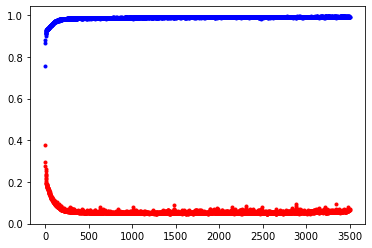

In [24]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()